# Ejercicio 1: Optimización de carteras SIN POSICIONES CORTAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf
import seaborn as sns
from scipy.interpolate import interp1d

plt.style.use("ggplot")

In [ ]:
assets_info = {
    "BA": {
        "name": "Boeing Co.",
        "description": "Aerospace company designing and manufacturing commercial airplanes, defense systems, and space technology."
    },
    "BAX": {
        "name": "Baxter International Inc.",
        "description": "Medical products company focused on renal care, hospital products, and clinical nutrition."
    },
    "BMY": {
        "name": "Bristol Myers Squibb",
        "description": "Global biopharmaceutical company developing therapies in oncology, cardiovascular, and immunology."
    },
    "CMCSA": {
        "name": "Comcast Corporation",
        "description": "Telecommunications and media company providing cable services, broadband, and entertainment content."
    },
    "CNP": {
        "name": "CenterPoint Energy",
        "description": "Electric and natural gas utility serving residential, commercial, and industrial customers."
    },
    "CPB": {
        "name": "Campbell Soup Company",
        "description": "Food company producing soups, snacks, beverages, and packaged meals."
    },
    "DE": {
        "name": "Deere & Company",
        "description": "Manufacturer of agricultural, construction, and forestry machinery under the John Deere brand."
    },
    "F": {
        "name": "Ford Motor Company",
        "description": "Automotive manufacturer producing vehicles, electric cars, and mobility services."
    },
    "GE": {
        "name": "General Electric",
        "description": "Industrial company focused on aerospace, energy, and industrial technologies."
    },
    "HPQ": {
        "name": "HP Inc.",
        "description": "Technology company specializing in personal computers, printers, and related services."
    },
    "JCI": {
        "name": "Johnson Controls International",
        "description": "Provider of building technologies, HVAC systems, and energy management solutions."
    },
    "JPM": {
        "name": "JPMorgan Chase & Co.",
        "description": "Global financial services firm offering investment banking, asset management, and retail banking."
    },
    "KHC": {
        "name": "Kraft Heinz Company",
        "description": "Global food company producing packaged foods and condiments."
    },
    "LUV": {
        "name": "Southwest Airlines",
        "description": "Low-cost airline providing domestic and international passenger air transportation."
    },
    "MMC": {
        "name": "Marsh & McLennan Companies",
        "description": "Professional services firm specializing in insurance brokerage, risk management, and consulting."
    },
    "MO": {
        "name": "Altria Group",
        "description": "Consumer products company focused primarily on tobacco and nicotine products."
    },
    "NI": {
        "name": "NiSource Inc.",
        "description": "Energy holding company operating natural gas and electric utilities."
    },
    "PCAR": {
        "name": "PACCAR Inc.",
        "description": "Manufacturer of heavy-duty trucks under brands such as Peterbilt, Kenworth, and DAF."
    },
    "PSA": {
        "name": "Public Storage",
        "description": "Real estate investment trust specializing in self-storage facilities."
    },
    "SEE": {
        "name": "Sealed Air Corporation",
        "description": "Packaging solutions company focused on food safety and product protection."
    },
    "T": {
        "name": "AT&T Inc.",
        "description": "Telecommunications company providing wireless, broadband, and communication services."
    },
    "TGT": {
        "name": "Target Corporation",
        "description": "Retail company operating discount department stores and online retail platforms."
    },
    "TMO": {
        "name": "Thermo Fisher Scientific",
        "description": "Provider of scientific instruments, laboratory equipment, and life sciences services."
    },
    "TXT": {
        "name": "Textron Inc.",
        "description": "Industrial conglomerate producing aircraft, defense systems, and industrial products."
    },
    "VZ": {
        "name": "Verizon Communications",
        "description": "Telecommunications company offering wireless, broadband, and digital services."
    },
    "ZION": {
        "name": "Zions Bancorporation",
        "description": "Regional banking organization providing commercial and retail banking services."
    }
}


In [ ]:
# Date range
start = "2015-01-01"
end = "2019-12-30"

# Assets
assets = list(assets_info.keys())

# Downloading data
prices = yf.download(assets, start=start, end=end, auto_adjust=True)["Close"]
prices.columns = assets

[*********************100%***********************]  26 of 26 completed


In [ ]:
# Número de activos
num_act = prices.shape[1]

In [ ]:
# Calculamos los retornos logaritmicos
returns = np.log(prices).diff().dropna()
returns.head(2)

,BA,BAX,BMY,CMCSA,CNP,CPB,DE,F,GE,HPQ,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,0.018543,-0.024751,0.010757,0.006419,0.019578,0.014909,0.007402,0.004049,0.006063,0.007495,...,0.016491,0.003577,0.022570,0.003248,0.004483,0.018163,0.004285,-0.003387,0.004454,-0.021060
2015-07-08,-0.008629,-0.016575,-0.007208,-0.013205,-0.019578,-0.008582,-0.013805,-0.032857,-0.022155,-0.011429,...,0.001167,-0.023246,0.003109,-0.023935,-0.010230,-0.011552,-0.021224,-0.028682,-0.002573,-0.026208


In [ ]:
# Calculamos la matriz de covarianzas y los retornos esperados
matriz_cov = returns.cov().to_numpy()
retornos_esperados = returns.mean().to_numpy()

Vemos las correlaciones entre los activos

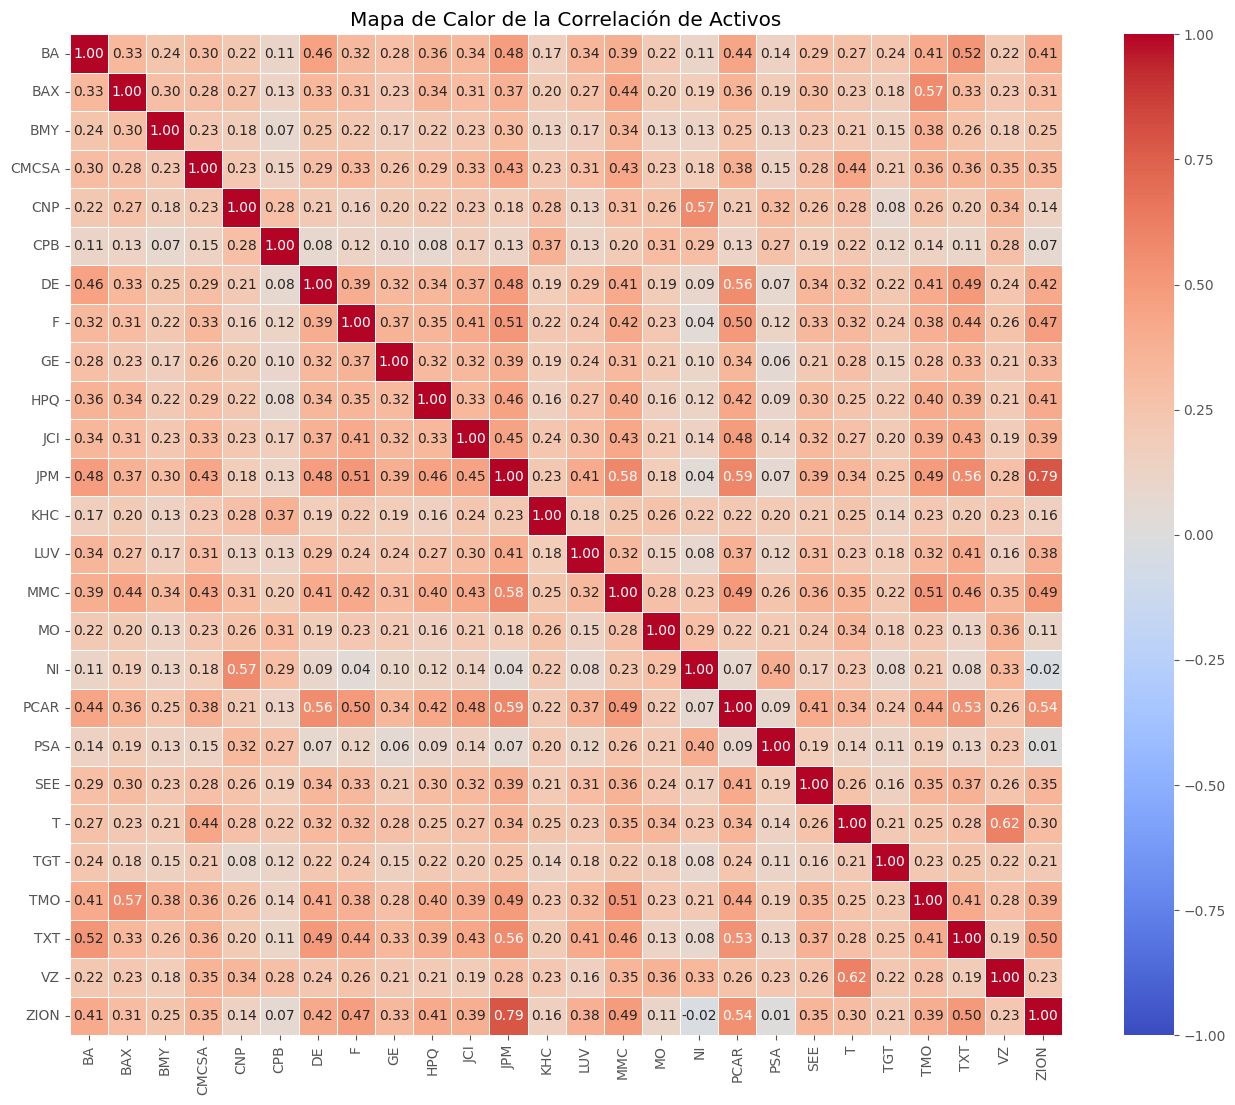

In [ ]:
# Correlation matrix
mat_corr = returns.corr().to_numpy()

# Configurando el tamaño de la figura
plt.figure(figsize=(16, 13))
sns.heatmap(
    mat_corr,
    linewidths=0.5,
    cmap="coolwarm",
    xticklabels=assets,
    yticklabels=assets,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
)
# Añadiendo título
plt.title("Mapa de Calor de la Correlación de Activos")

# Mostrando la gráfica
plt.show()

Hacemos la gráfica de rentabilidad-riesgo de los activos

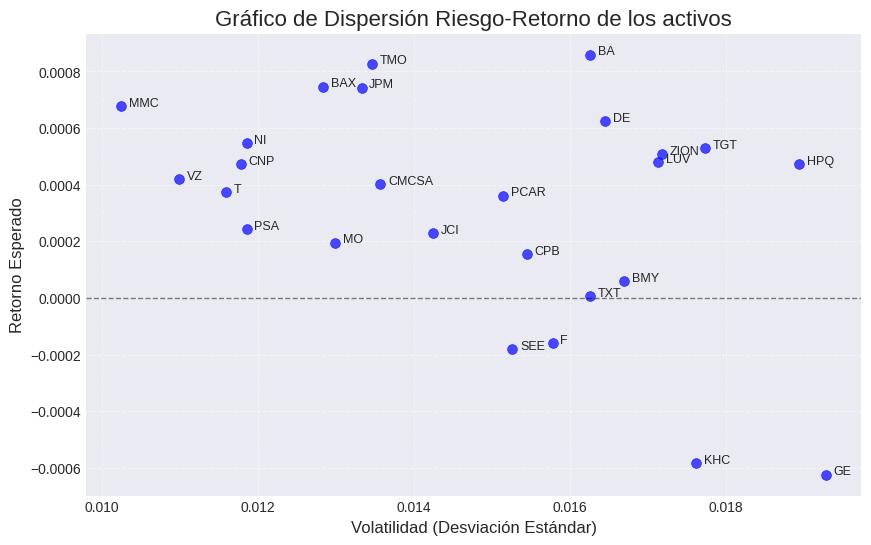

In [ ]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use("seaborn-v0_8-darkgrid")

plt.scatter(
    np.sqrt(np.diag(matriz_cov)),  # Volatilidad (desviación típica)
    retornos_esperados,
    color="blue",
    s=50,
    label="Activos",
    alpha=0.7,
)

plt.axhline(0, color="black", lw=1, linestyle="--", alpha=0.5)

# Añadiendo títulos y etiquetas
plt.title("Gráfico de Dispersión Riesgo-Retorno de los activos", fontsize=16)
plt.xlabel("Volatilidad (Desviación Estándar)", fontsize=12)
plt.ylabel("Retorno Esperado", fontsize=12)

# Añadiendo leyenda con mejor posición
# plt.legend(loc='best')

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(
        np.sqrt(matriz_cov[i, i]) + desplazamiento_x,
        retornos_esperados[i],
        asset,
        fontsize=9,
    )


# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

## Ejercicio 1: Cáculo de la cartera de *máxima rentabilidad según tolerancia al riesgo*

Los inversores tienen distintos niveles de tolerancia al riesgo, conocida como aversión al riesgo. Recordad la ecuación definida por Markowitz:

$$\underset{w}{\max} f(w)=w^T\mu-\lambda w^T\Sigma w$$

Ahora vamos a calcular las carteras con la mayor rentabilidad para distintos niveles de aversión al riesgo.

- El factor $\Large \boldsymbol{\lambda}$ representa la aversión al riesgo de un inversor.

- Hay que tener en cuenta que $\Large \boldsymbol{\lambda}$ $\geq 0$
  
- Un $\Large \boldsymbol{\lambda}$ bajo indica mayor tolerancia al riesgo para buscar altos rendimientos.
  
- Un $\Large \boldsymbol{\lambda}$ alto muestra preferencia por inversiones seguras con rendimientos menores.
  
- $\Large \boldsymbol{\lambda}$ equilibra riesgo y rendimiento en la selección de carteras.


In [ ]:
# Variables de decisión
pesos = cp.Variable(num_act)

# Factor aversión al riesgo
gamma = cp.Parameter(
    nonneg=True
)  # No lo llamo lambda porque es una palabra reservada en python

ret = retornos_esperados.T @ pesos

riesgo = cp.quad_form(pesos, matriz_cov)  # Varianza

Definimos la **función objetivo**:

- La función objetivo busca maximizar las ganancias, pero reduce la rentabilidad si hay mucho riesgo.

- Restar el riesgo multiplicado por el factor gamma hace que, a igual rentabilidad, se elijan carteras menos riesgosas.

- Con un gamma alto, que indica poca tolerancia al riesgo, se prioriza la seguridad aunque las ganancias sean menores.

In [ ]:
objetivo = cp.Maximize(ret - gamma * riesgo)

In [ ]:
# Restricciones y función objetivo
constraints = [pesos >= 0, cp.sum(pesos) == 1]

prob = cp.Problem(objetivo, constraints)

In [ ]:
num_sim = 100
# Valores de gamma
gamma_vals = np.logspace(-2, 3, num=num_sim)

# Listas para guardar resultados
retornos_res = []
riesgos_res  = []
pesos_res    = []

# Bucle principal
for g in gamma_vals:
    gamma.value = g
    prob.solve()

    retornos_res.append(ret.value)
    riesgos_res.append(np.sqrt(riesgo.value))
    pesos_res.append(pesos.value.copy())
pesos_res = np.array(pesos_res)

In [ ]:
pesos_res.shape

(100, 26)

Ahora representamos todo

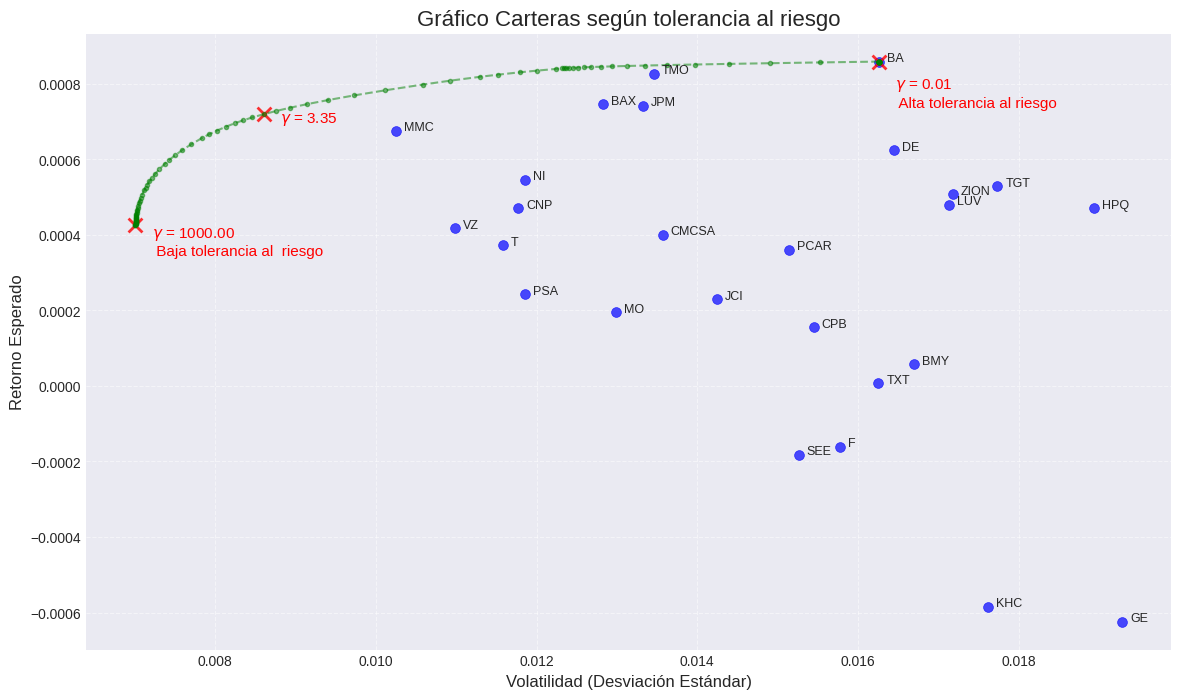

In [ ]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(14, 8))
plt.style.use("seaborn-v0_8-darkgrid")

# Puntos de cada activo
plt.scatter(
    np.sqrt(np.diag(matriz_cov)),  # Volatilidad (desviación típica)
    retornos_esperados,
    color="blue",
    s=50,
    label="Activos",
    alpha=0.7,
)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00002  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(
        np.sqrt(matriz_cov[i, i]) + desplazamiento_x,
        retornos_esperados[i],
        asset,
        fontsize=9,
    )

# Carteras en la frontera eficiente.
plt.plot(
    riesgos_res,
    retornos_res,
    ".--",
    color="green",
    label="Frontera Eficiente",
    alpha=0.5,
)

# Última cartera en la frontera eficiente.
plt.scatter(
    riesgos_res[num_sim - 1],
    retornos_res[num_sim - 1],
    color="red",
    s=100,
    marker="x",
    linewidths=2,
    alpha=0.8,
    label=rf"$\gamma$ = {gamma_vals[num_sim-1]:.2f}",
)
plt.text(
    riesgos_res[num_sim - 1] + 2 * desplazamiento_x,
    retornos_res[num_sim - 1] - 4 * desplazamiento_y,
    rf"$\gamma$ = {gamma_vals[num_sim-1]:.2f} " "\n Baja tolerancia al  riesgo",
    fontsize=11,
    color="red",
)

# Cartera intermedia en la frontera eficiente.
plt.scatter(
    riesgos_res[int(num_sim / 2)],
    retornos_res[int(num_sim / 2)],
    color="red",
    s=100,
    marker="x",
    linewidths=2,
    alpha=0.8,
    label=rf"$\gamma$ = {gamma_vals[int(num_sim/2)]:.2f}",
)
plt.text(
    riesgos_res[int(num_sim / 2)] + 2 * desplazamiento_x,
    retornos_res[int(num_sim / 2)] - desplazamiento_y,
    rf"$\gamma$ = {gamma_vals[int(num_sim/2)]:.2f}",
    fontsize=11,
    color="red",
)

# Primera cartera en la frontera eficiente.
plt.scatter(
    riesgos_res[int(0)],
    retornos_res[int(0)],
    color="red",
    s=100,
    marker="x",
    linewidths=2,
    alpha=0.8,
    label=rf"$\gamma$ = {gamma_vals[int(0)]:.2f}",
)
plt.text(
    riesgos_res[int(0)] + 2 * desplazamiento_x,
    retornos_res[int(0)] - 6 * desplazamiento_y,
    rf"$\gamma$ = {gamma_vals[0]:.2f}" "\n Alta tolerancia al riesgo",
    fontsize=11,
    color="red",
)

# Añadiendo títulos y etiquetas
plt.title("Gráfico Carteras según tolerancia al riesgo", fontsize=16)
plt.xlabel("Volatilidad (Desviación Estándar)", fontsize=12)
plt.ylabel("Retorno Esperado", fontsize=12)

# Añadiendo leyenda con mejor posición
# plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

/tmp/ipython-input-1403378918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  paleta = cm.get_cmap("tab20c", num_act)


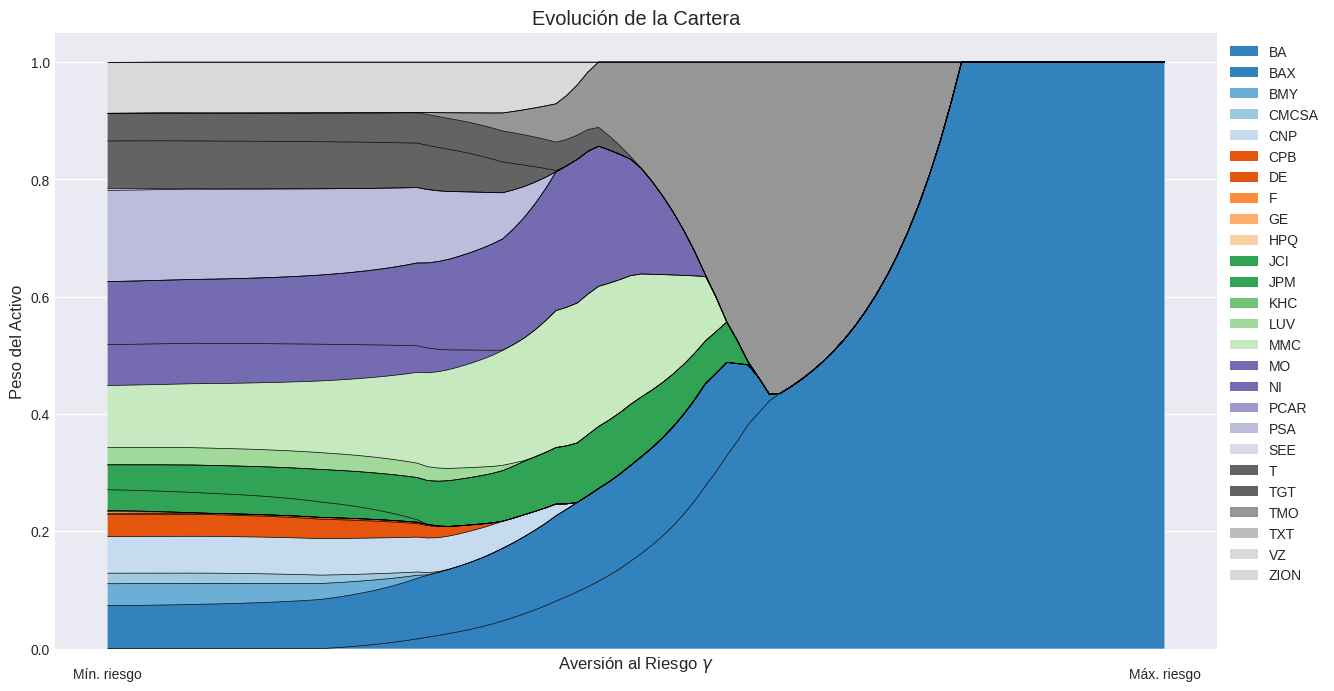

In [ ]:
# Elegir una paleta de colores y generar colores
from matplotlib import cm

paleta = cm.get_cmap("tab20c", num_act)
colores = [paleta(i) for i in range(num_act)]

# import matplotlib as mpl

# paleta = mpl.colormaps["tab20c"].resampled(num_act)
# colores = paleta.colors

# Crear una gráfica de áreas apiladas
tiempo = np.arange(num_sim)  # Eje x - tiempo

plt.figure(figsize=(15, 8))

plt.stackplot(
    tiempo, pesos_res.T, colors=colores, labels=[f"{assets[i]}" for i in range(num_act)]
)

# Añadir bordes a las áreas
for i in range(num_act):
    plt.plot(
        tiempo, np.sum(pesos_res[:, : i + 1], axis=1), color="black", linewidth=0.5
    )

# Invertir el eje x
plt.gca().invert_xaxis()

# Añadir texto personalizado en el eje x
plt.text(num_sim - 1, -0.05, "Mín. riesgo", ha="center")  # Cerca del 100
plt.text(0, -0.05, "Máx. riesgo", ha="center")  # Cerca del 0


plt.xlabel(r"Aversión al Riesgo $\gamma$")
plt.ylabel("Peso del Activo")
plt.title("Evolución de la Cartera")

# Ajustar la leyenda fuera del área del gráfico
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks([], [])

plt.show()

## Ejercicio 2: Cálculo de la cartera de *mínimo riesgo*

Calcula la cartera de *mínimo riesgo* sin posiciones cortas.

In [ ]:
# TODO Variables de decisión


In [ ]:
# TODO Restricciones


In [ ]:
# TODO Función Objetivo


In [ ]:
# TODO Problema y resuelvo


In [ ]:
# Verificar si se encontró una solución óptima
if problema.status == cp.OPTIMAL:
    # Resultados
    pesos_optimos = pesos.value
    print(f"Optimización exitosa. Valor óptimo: {resultado}")
else:
    print(f"No se pudo encontrar una solución óptima. Estado: {problema.status}")
    if problema.status == cp.INFEASIBLE:
        print(
            "El problema es infactible. Las restricciones no pueden satisfacerse simultáneamente."
        )
    elif problema.status == cp.UNBOUNDED:
        print(
            "El problema es no acotado. La función objetivo puede mejorarse indefinidamente."
        )
    elif problema.status == cp.OPTIMAL_INACCURATE:
        print("Se encontró una solución óptima pero con precisión reducida.")
        pesos_optimos = pesos.value

Optimización exitosa. Valor óptimo: 4.914871556155138e-05


In [ ]:
# Guardamos los valores de la rentabilidad y riesgo de la cartera de mínimo riesgo


In [ ]:
print(f"Los pesos que hacen que la cartera tenga el mínimo riesgo son: \n{pesos.value}")

Los pesos que hacen que la cartera tenga el mínimo riesgo son: 
[-1.52270000e-19  7.18322275e-02  3.84883385e-02  1.82481328e-02
  6.19057358e-02  3.86458659e-02  2.26994749e-04  5.16978699e-03
  3.81661154e-03 -4.85681035e-19  3.56266853e-02  3.94723524e-02
  2.69998147e-19  2.92425995e-02  1.03709272e-01  7.00227813e-02
  1.06630373e-01 -1.09192172e-19  1.56189539e-01  4.59088030e-03
  8.12763833e-02  4.68242655e-02 -3.26459241e-19 -4.18248660e-19
  8.66585846e-02  1.42259033e-03]


Podemos visualizar los pesos de diferentes formas. Una de ellas es dibujar en un diagrama de barras el peso $w_i$ de cada activo.

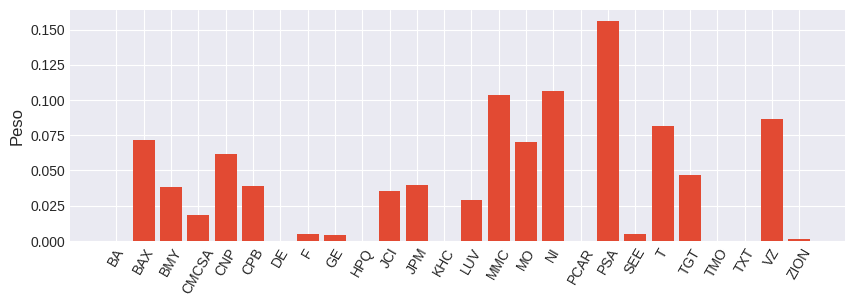

In [ ]:
plt.figure(figsize=(10, 3))
plt.bar(range(num_act), pesos.value)
plt.xticks(range(num_act), assets, rotation=60)
plt.ylabel("Peso")
plt.show()

Otra opción es dibujar un gráfico circular (diagrama de sectores).

CVXPY resuelve el problema de manera numérica. Esto hace que haya pesos con valores muy pequeños, en el caso anterior hay pesos con valores de $10^{-9}$, que los podemos poner a cero.

In [ ]:
# ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0 for x in pesos.value])
pesos_ajustados

array([0.   , 0.072, 0.038, 0.018, 0.062, 0.039, 0.   , 0.005, 0.004,
       0.   , 0.036, 0.039, 0.   , 0.029, 0.104, 0.07 , 0.107, 0.   ,
       0.156, 0.005, 0.081, 0.047, 0.   , 0.   , 0.087, 0.001])

In [ ]:
activos_filtrados = [
    asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0
]  # Activos con pesos mayores a 10**-4


pesos_filtrados = [x for x in pesos_ajustados if x > 0]  # Pesos mayores a 10**-4

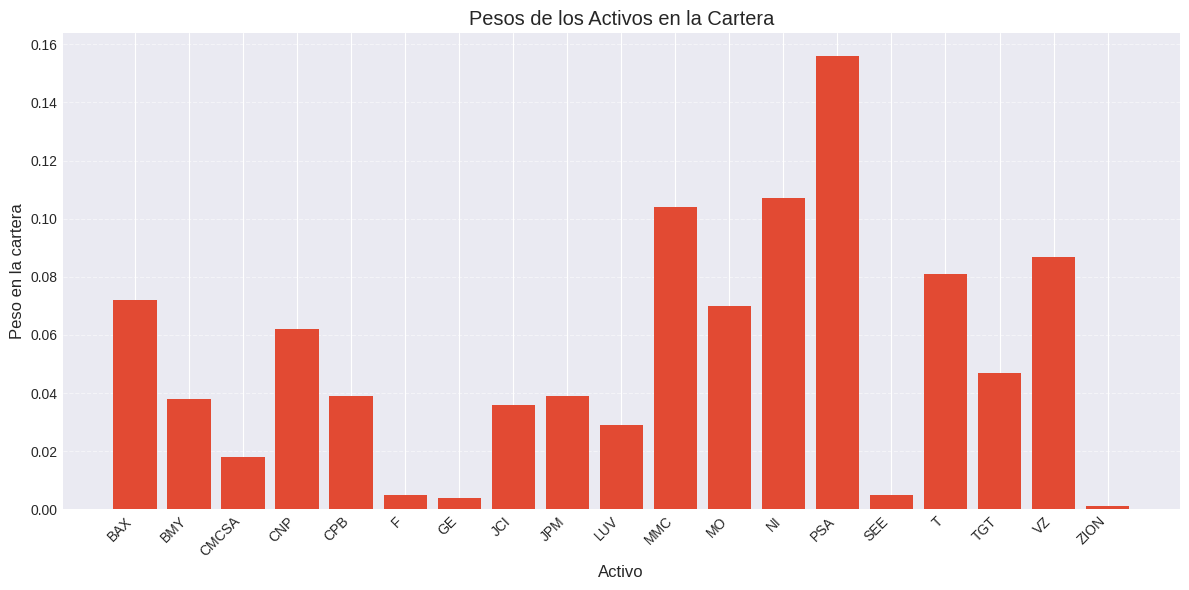

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(activos_filtrados, pesos_filtrados)

plt.xlabel("Activo")
plt.ylabel("Peso en la cartera")
plt.title("Pesos de los Activos en la Cartera")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


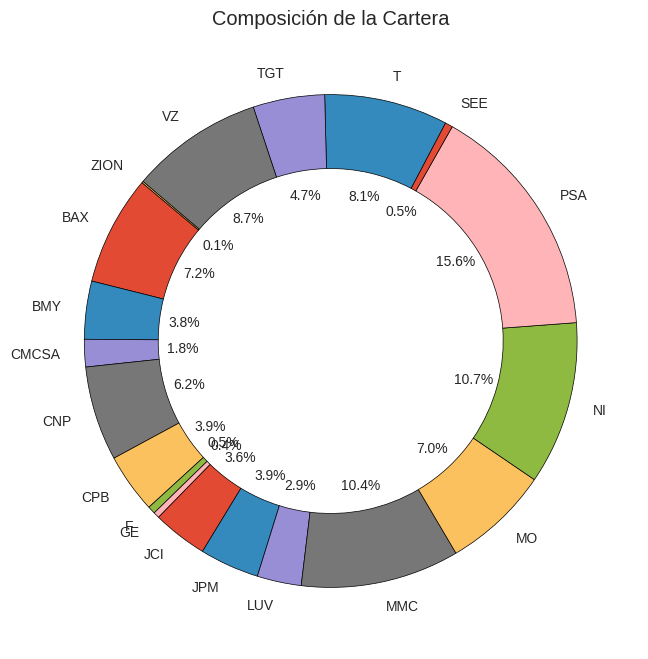

In [ ]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(
    pesos_filtrados,
    labels=activos_filtrados,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"width": 0.3, "edgecolor": "black"},
)

# Añadir título
plt.title("Composición de la Cartera")

# Mostrar el gráfico
plt.show()

Ahora vamos a representar esta carteras junto con los activos.




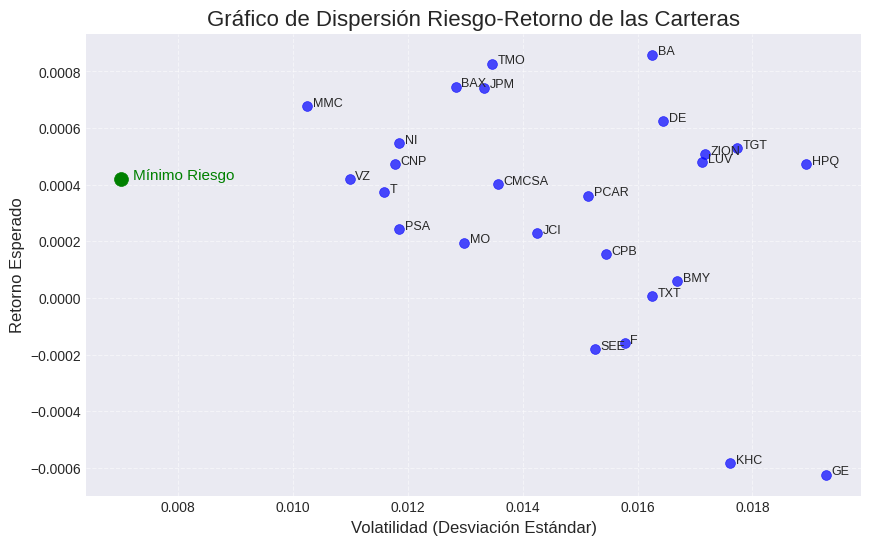

In [ ]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(
    np.sqrt(np.diag(matriz_cov)),  # Volatilidad (desviación típica)
    retornos_esperados,  # Retorno
    color="blue",
    s=50,
    label="Activos",
    alpha=0.7,
)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00005  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(
        np.sqrt(matriz_cov[i, i]) + desplazamiento_x,
        retornos_esperados[i],
        asset,
        fontsize=9,
    )


# Punto de mínimo riesgo
plt.scatter(
    np.sqrt(min_riesgo[0]),
    min_riesgo[1],
    color="green",
    s=100,
    marker="o",
    label="Mínimo Riesgo",
)
plt.text(
    np.sqrt(min_riesgo[0]) + 2 * desplazamiento_x,
    min_riesgo[1],
    "Mínimo Riesgo",
    fontsize=11,
    color="green",
)


# Añadiendo títulos y etiquetas
plt.title("Gráfico de Dispersión Riesgo-Retorno de las Carteras", fontsize=16)
plt.xlabel("Volatilidad (Desviación Estándar)", fontsize=12)
plt.ylabel("Retorno Esperado", fontsize=12)

# Añadiendo leyenda con mejor posición
# plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

## Ejercicio 3: Cartera de *máxima rentabilidad* dado un *riesgo máximo permitido*

Un asesor financiero debe diseñar una cartera de inversión para un cliente que ha establecido claramente su perfil de riesgo. El cliente indica que no está dispuesto a asumir un nivel de riesgo superior a `0.012`.

Bajo esta condición, el objetivo del asesor es determinar la cartera que maximiza la rentabilidad esperada, asegurando en todo momento que el riesgo de la cartera no exceda el umbral fijado por el cliente.

In [ ]:
# TODO

In [ ]:
# Verificar si se encontró una solución óptima


In [ ]:
# Quedarse con los activos con pesos significativos

In [ ]:
# Hacer la gráfica de los pesos

Veamos la cartera junto a los distintos activos.

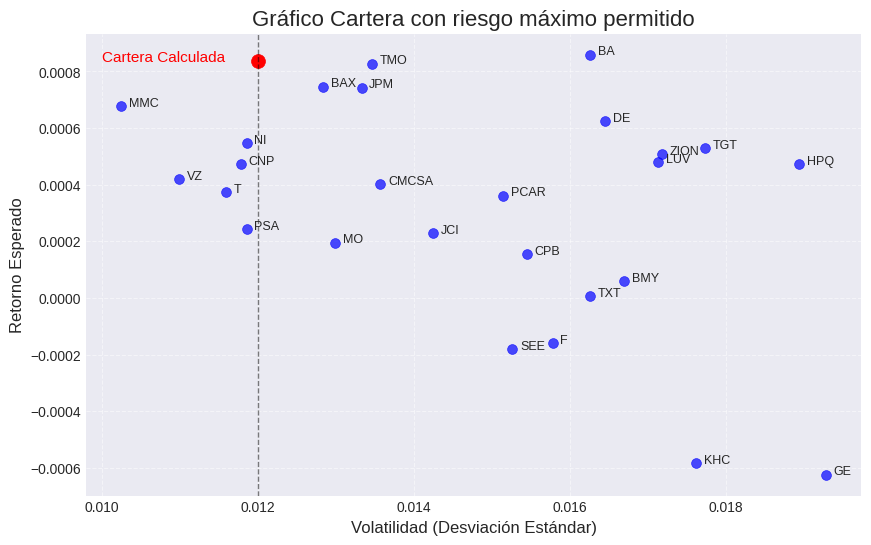

In [ ]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(
    np.sqrt(np.diag(matriz_cov)),  # Volatilidad (desviación típica)
    retornos_esperados,
    color="blue",
    s=50,
    alpha=0.7,
)


# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00003  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(
        np.sqrt(matriz_cov[i, i]) + desplazamiento_x,
        retornos_esperados[i],
        asset,
        fontsize=9,
    )


plt.scatter(
    np.sqrt(riesgo.value),  # Volatilidad (desviación típica)
    resultado,
    color="red",
    s=100,
    marker="o",
)
plt.text(
    np.sqrt(riesgo.value) - 20 * desplazamiento_x,
    resultado,
    "Cartera Calculada",
    fontsize=11,
    color="red",
)

plt.axvline(riesgo_obj, color="black", lw=1, linestyle="--", alpha=0.5)


# Añadiendo títulos y etiquetas
plt.title("Gráfico Cartera con riesgo máximo permitido", fontsize=16)
plt.xlabel("Volatilidad (Desviación Estándar)", fontsize=12)
plt.ylabel("Retorno Esperado", fontsize=12)

# Añadiendo leyenda con mejor posición
# plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

## Ejercicio 4: Carteras con restricciones en la cantidad máxima invertida en un activo

Un gestor de carteras desea construir una cartera de inversión con el objetivo de maximizar la rentabilidad esperada. Sin embargo, por motivos de gestión del riesgo y control de concentración, el gestor impone una restricción adicional: no se puede invertir más de un cierto porcentaje `max_inv` de la cartera en un único activo.

In [ ]:
# TODO restricciones

max_inv = 0.1  # Máxima inversión en un activo

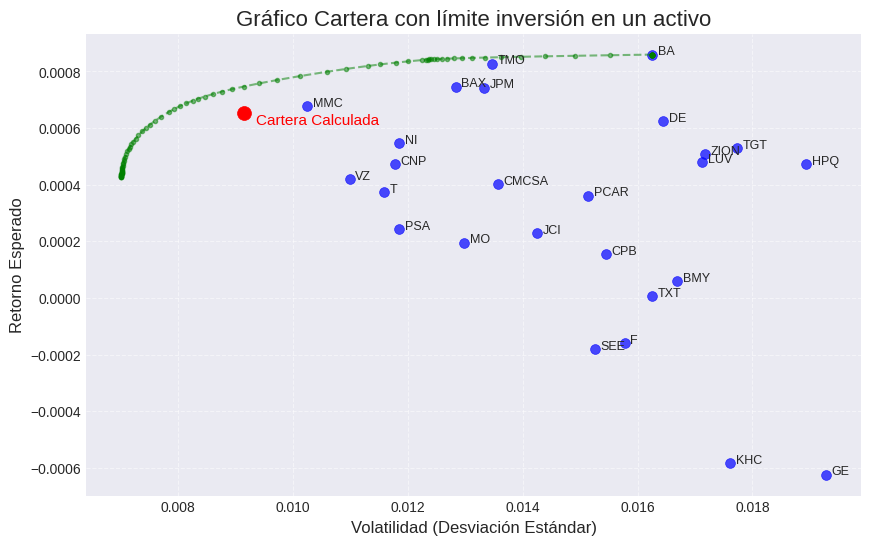

In [ ]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(
    np.sqrt(np.diag(matriz_cov)),
    retornos_esperados,
    color="blue",
    s=50,
    label="Activos",
    alpha=0.7,
)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00002  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(
        np.sqrt(matriz_cov[i, i]) + desplazamiento_x,
        retornos_esperados[i],
        asset,
        fontsize=9,
    )

# Carteras en la frontera eficiente.
plt.plot(
    riesgos_res,
    retornos_res,
    ".--",
    color="green",
    label="Frontera Eficiente",
    alpha=0.5,
)

# Cartera calculada.
plt.scatter(
    np.sqrt(cp.quad_form(pesos, matriz_cov).value),
    resultado,
    color="red",
    s=100,
    marker="o",
    label="Cartera Calculada",
)
plt.text(
    np.sqrt(cp.quad_form(pesos, matriz_cov).value) + 2 * desplazamiento_x,
    resultado - 2 * desplazamiento_y,
    "Cartera Calculada",
    fontsize=11,
    color="red",
)

# Añadiendo títulos y etiquetas
plt.title("Gráfico Cartera con límite inversión en un activo", fontsize=16)
plt.xlabel("Volatilidad (Desviación Estándar)", fontsize=12)
plt.ylabel("Retorno Esperado", fontsize=12)

# Añadiendo leyenda con mejor posición
# plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

## Ejercicio 5: Optimización de cartera con restricciones de diversificación y rentabilidad

Un gestor de inversiones desea construir una cartera que minimice el riesgo total, medido como la varianza de la cartera, incorporando criterios realistas de diversificación y rentabilidad esperada.

En particular, el gestor impone las siguientes restricciones.

- En primer lugar, la cartera debe alcanzar una **rentabilidad esperada mínima**, definida como un porcentaje del mayor retorno esperado entre los activos disponibles. Definimos la variable `factor = 0.8` para representar el porcentaje.

- En segundo lugar, la cartera debe incluir **al menos un número mínimo de activos**, con el objetivo de evitar una concentración excesiva del capital. Definimos la variable `min_act = 12` para que nuestra cartera tenga al menos 12 activos.

- Además, cada activo seleccionado debe tener una **inversión mínima**, garantizando que la diversificación sea económicamente relevante y no meramente nominal. Definimos la variable `peso_minimo = 0.05` para representar el porcentaje mínimo de inversión en un activo.

- **No se permiten posiciones cortas** y se debe **invertir todo el capital**.

El objetivo del ejercicio es determinar los pesos óptimos de la cartera que cumplen estas condiciones y permiten gestionar el riesgo de forma eficiente bajo restricciones habituales en la práctica de la gestión de carteras.


In [ ]:
# TO DO